In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv(r"C:\Users\hp\Downloads\IMDB_Movies.csv")

### Exploratory data analysis

In [84]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [85]:
df.shape

(5043, 28)

In [86]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [87]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [88]:
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          955
language                       46
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [89]:
df['movie_title'].duplicated().sum()

126

In [90]:
df.drop_duplicates(subset='movie_title',keep='first',inplace=True)

Dropped the duplicates in the movie title column because there should not be duplicate values in the records.

In [91]:
df['movie_title'].duplicated().sum()

0

In [92]:
df.isna().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

<Axes: >

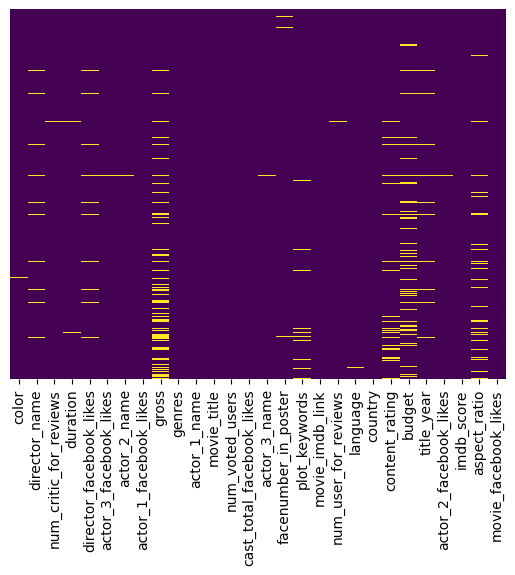

In [93]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since the gross column has roughly 50% null values and does not affect the imdb ratings (a movie’s gross is not necessarily related to its imdb rating), I dropped the gross column. The director_name column has very few null values and we cannot fill them with any values, so I dropped the records with empty director name column. I also dropped the records with null values in the language column, as we cannot fill them and the analysis is based on that column. There are very few null values in this column. I filled the null values in the budget and num user for reviews column with the mean values of the budget column. 

In [94]:
df=df.drop(columns=['gross'])

In [95]:
df=df.dropna(subset='director_name')

In [102]:
df=df.dropna(subset='language')

In [96]:
df.shape

(4815, 27)

In [97]:
df['budget'].fillna(value=(df['budget'].mean(skipna=True)),inplace=True)

In [100]:
df['duration'].fillna(value=(df['duration'].mean(skipna=True)),inplace=True)

In [98]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4771.000000,4802.000000,4815.000000,4795.000000,4808.000000,4.815000e+03,4815.000000,4802.000000,4.815000e+03,4811.000000,4804.000000,4815.000000,4508.000000,4815.000000
mean,140.311675,108.027072,690.871028,637.194369,6600.470466,8.374087e+04,9717.517965,1.369638,3.659283e+07,2002.443567,1645.262281,6.414372,2.127986,7404.116096
std,120.266972,22.626609,2832.677373,1641.485312,15237.621801,1.394037e+05,18317.747598,2.022828,9.616522e+07,12.455838,4048.709668,1.118256,0.798541,19329.788164
min,1.000000,7.000000,0.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,52.000000,94.000000,7.000000,132.000000,611.000000,8.600500e+03,1399.500000,0.000000,7.000000e+06,1999.000000,278.000000,5.800000,1.850000,0.000000
50%,111.000000,104.000000,48.000000,367.000000,989.000000,3.420300e+04,3092.000000,1.000000,2.200000e+07,2005.000000,595.000000,6.500000,2.350000,158.000000
75%,194.000000,118.000000,189.500000,636.000000,11000.000000,9.532800e+04,13816.000000,2.000000,4.000000e+07,2011.000000,918.000000,7.200000,2.350000,2000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,1.689764e+06,656730.000000,43.000000,4.200000e+09,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [103]:
df.isna().sum()

color                         12
director_name                  0
num_critic_for_reviews        42
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        18
actor_2_name                  10
actor_1_facebook_likes         7
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  18
facenumber_in_poster          13
plot_keywords                139
movie_imdb_link                0
num_user_for_reviews          17
language                       0
country                        1
content_rating               257
budget                         0
title_year                     2
actor_2_facebook_likes        10
imdb_score                     0
aspect_ratio                 301
movie_facebook_likes           0
dtype: int64

In [107]:
df.to_csv('imdb.csv',index=False)